In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [45]:
data = pd.read_csv('./data.csv')
data

,Title,Years,Certification,Runtime,Rating,Number of Votes,Emmys,Creators,Actors,Genres,Coutries of origins,Languages,Production companies,Link
0,Queen Cleopatra,"(2023, None)",TV-14,45.0,1.2,86000,0,NaN,"Jada Pinkett Smith, Adele James, Craig Russell...","Documentary, Drama, History",United Kingdom,English,Nutopia,https://www.imdb.com/title/tt27528139/?ref_=sr...
1,Velma,"(2023, 2024)",TV-MA,25.0,1.6,80000,0,Charlie Grandy,"Mindy Kaling, Glenn Howerton, Sam Richardson, ...","Animation, Adventure, Comedy, Crime, Horror, M...","United States, South Korea",English,"Charlie Grandy Productions, Kaling Internation...",https://www.imdb.com/title/tt14153790/?ref_=sr...
2,Keeping Up with the Kardashians,"(2007, 2021)",TV-14,44.0,2.9,32000,0,"Ryan Seacrest, Eliot Goldberg","Khloé Kardashian, Kim Kardashian, Kourtney Kar...","Family, Reality-TV",United States,"English, Spanish","Bunim-Murray Productions (BMP), Ryan Seacrest ...",https://www.imdb.com/title/tt1086761/?ref_=sr_...
3,Batwoman,"(2019, 2022)",TV-14,45.0,3.6,47000,0,Caroline Dries,"Camrus Johnson, Rachel Skarsten, Meagan Tandy,...","Action, Adventure, Crime, Drama, Sci-Fi",United States,English,"Berlanti Productions, DC Entertainment, Warner...",https://www.imdb.com/title/tt8712204/?ref_=sr_...
4,The Acolyte,"(2024, None)",TV-14,35.0,4.1,125000,0,Leslye Headland,"Lee Jung-jae, Amandla Stenberg, Manny Jacinto,...","Action, Adventure, Drama, Fantasy, Mystery, Sc...",United States,English,"Lucasfilm, Disney+, The Walt Disney Company",https://www.imdb.com/title/tt12262202/?ref_=sr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,The Wire,"(2002, 2008)",TV-MA,60.0,9.3,390000,0,David Simon,"Dominic West, Lance Reddick, Sonja Sohn, Wende...","Crime, Drama, Thriller",United States,"English, Greek, Mandarin, Spanish","Blown Deadline Productions, Home Box Office (HBO)",https://www.imdb.com/title/tt0306414/?ref_=sr_i_5
1134,Planet Earth,"(2006, None)",TV-PG,50.0,9.4,223000,4,NaN,"Sigourney Weaver, David Attenborough, Nikolay ...","Documentary, Family","United Kingdom, Canada, United States, Japan",English,"British Broadcasting Corporation (BBC), Canadi...",https://www.imdb.com/title/tt0795176/?ref_=sr_i_4
1135,Band of Brothers,"(2001, None)",TV-MA,60.0,9.4,544000,6,NaN,"Scott Grimes, Damian Lewis, Ron Livingston, Sh...","Drama, History, War","United Kingdom, United States","English, Dutch, French, German, Lithuanian","DreamWorks, DreamWorks Television, HBO Films",https://www.imdb.com/title/tt0185906/?ref_=sr_i_3
1136,Planet Earth II,"(2016, None)",TV-G,50.0,9.5,162000,2,NaN,"David Attenborough, Michael J. Sanderson, Gord...",Documentary,"United Kingdom, Germany, France, China, United...","English, French","BBC Natural History Unit (NHU), BBC America, Z...",https://www.imdb.com/title/tt5491994/?ref_=sr_i_2


# Handle Year

In [46]:
def process_years(years):
    # Replace the special character '–' with '-'
    years = years.replace('–', '-')
    
    # Split the string by '-' and process the parts
    parts = years.split('-')
    year_start = int(parts[0]) if parts[0].isdigit() else None
    year_end = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else None
    
    return (year_start, year_end)


data['Years'] = data['Years'].apply(process_years)


print(data['Years'])

0       (None, None)
1       (None, None)
2       (None, None)
3       (None, None)
4       (None, None)
            ...     
1133    (None, None)
1134    (None, None)
1135    (None, None)
1136    (None, None)
1137    (None, None)
Name: Years, Length: 1138, dtype: object


# Meaningful Question

| **Question**                                |**Meaning**                               |  
|-----------------------------------------------|-----------------------------------------------------------------------------------------|  
| **Question 1: Find the best program**         | Identify the best program based on the columns: Runtime, Rating, Number of Votes, an Emmys.              |  
| **Question 2: Trends in runtime and ratings over the years** | - Determine whether audiences prefer long or short programs. <br> - Analyze trends in ratings over time.   |  
| **Question 3: Explore the relationship between Rating and other columns** | - Identify the impact of runtime on ratings. <br> - Provide guidance on suitable runtime for new programs.  |  



**Question 1: Find the best program**

In [47]:
matrix_corr = data[['Runtime', 'Rating', 'Number of Votes', 'Emmys']].corr()
matrix_corr

,Runtime,Rating,Number of Votes,Emmys
Runtime,1.000000,-0.035431,0.058511,0.043912
Rating,-0.035431,1.000000,0.262723,0.177613
Number of Votes,0.058511,0.262723,1.000000,0.359516
Emmys,0.043912,0.177613,0.359516,1.000000


Here, we use the Min-Max Normalization method, which is a feature scaling technique. This method helps adjust the values of a variable so that they fall within a specific range, typically from 0 to 1. If you want read it, you con access [*Link*](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)).

In [48]:
df = pd.DataFrame(data)

# Min-Max Normalization
# For each column, apply the formula: (x - min) / (max - min)
df['Runtime_norm'] = (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())
# df['Rating_norm'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())
df['Votes_norm'] = (df['Number of Votes'] - df['Number of Votes'].min()) / (df['Number of Votes'].max() - df['Number of Votes'].min())
df['Emmys_norm'] = (df['Emmys'] - df['Emmys'].min()) / (df['Emmys'].max() - df['Emmys'].min())


Define weight and calculate score

In [49]:
runtime_weight = 1/3
# rating_weight = 1/4
votes_weight = 1/3
emmys_weight = 1/3

df['Composite Score'] = (
    df['Runtime_norm'] *runtime_weight +
    # df['Rating_norm'] * rating_weight +
    df['Votes_norm'] * votes_weight +
    df['Emmys_norm'] * emmys_weight
)

Visualization score

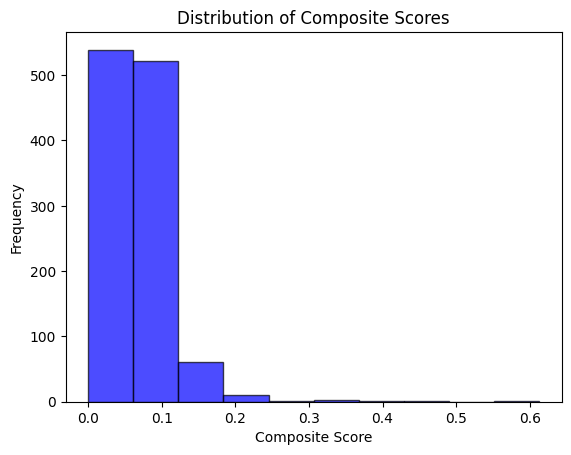

In [50]:

# Plot histogram of composite scores
plt.hist(df['Composite Score'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()


Watch the best TV show

In [51]:

top_shows = df.nlargest(10, 'Composite Score')[['Title', 'Composite Score']]
print("Top 10 shows:")
print(top_shows)

Top 10 shows:
                    Title  Composite Score
1126      Game of Thrones         0.612815
617   Saturday Night Live         0.446099
1137         Breaking Bad         0.415751
6                The Idol         0.349193
124                  Dune         0.327066
1049      Stranger Things         0.307551
1115             Sherlock         0.277117
1132            Chernobyl         0.230920
1043         The Simpsons         0.215202
1125         The Sopranos         0.212253


**Question 2: Trends in runtime and ratings over the years**

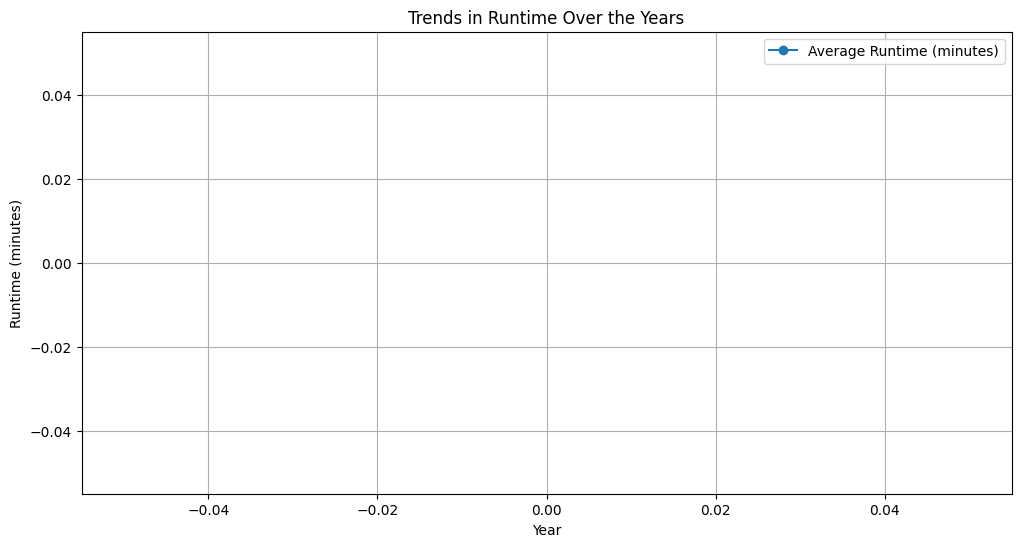

In [52]:
data[['Year_Start', 'Year_End']] = pd.DataFrame(data['Years'].tolist(), index=data.index)

data['Year'] = data['Year_Start']

grouped_data = data.groupby('Year')[['Runtime', 'Rating']].mean()


# Plot runtime trends over years
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Runtime'], marker='o', label='Average Runtime (minutes)')
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.title('Trends in Runtime Over the Years')
plt.legend()
plt.grid(True)
plt.show()





To better understand viewer preferences regarding program runtime, we can perform some analyses based on the available data, particularly focusing on Runtime and Rating

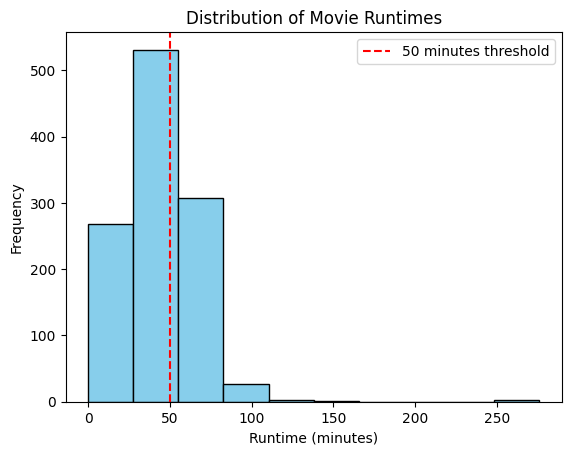

In [53]:
# Biểu đồ histogram để xem phân bố thời lượng của tất cả các bộ phim.
plt.hist(df['Runtime'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(50, color='red', linestyle='--', label='50 minutes threshold')
plt.legend()
plt.show()

It seems that viewers tend to prefer movies with shorter runtimes, especially those with a duration under 50 minutes. This could reflect a general audience preference for programs or movies that are easy to access and watch in a short amount of time, aligning with their busy lifestyles or content consumption habits. Shorter films allow viewers to complete them in one sitting without feeling overwhelmed, and they may also promote focus and a seamless viewing experience. This trend could also be related to the increasing number of people watching shows on online platforms, where viewers can easily choose and enjoy shorter movies that save time.

We will then proceed to search for and identify the locations of the shorter films in our list of top-ranked movies. This can help us better understand the relationship between runtime and movie rating quality. By examining the short films in this list, we can determine whether a shorter runtime is an important factor in the high ratings of these films.

In [54]:
# Lấy các bộ phim có thời lượng dưới 50 phút
short_runtime_movies = df[df['Runtime'] < 50]

# Lấy 20 bộ phim có Composite Score cao nhất từ short_runtime_movies
top_20_short_runtime = short_runtime_movies.nlargest(20, 'Composite Score')

# Tìm vị trí của các bộ phim đó trong danh sách toàn bộ dựa trên Composite Score
positions_in_all = df['Composite Score'].rank(ascending=False)
top_20_short_runtime['Rank in All'] = top_20_short_runtime['Composite Score'].rank(ascending=False).astype(int)

# Hiển thị kết quả
print("Các bộ phim dưới 50 phút:")
print(short_runtime_movies[['Title', 'Composite Score']])

print("\nTop 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):")
print(top_20_short_runtime[['Title', 'Composite Score', 'Rank in All']])

Các bộ phim dưới 50 phút:
                                Title  Composite Score
0                     Queen Cleopatra         0.062909
1                               Velma         0.037913
2     Keeping Up with the Kardashians         0.054123
3                            Batwoman         0.057436
4                         The Acolyte         0.056306
...                               ...              ...
1123      Cosmos: A Spacetime Odyssey         0.083260
1129                Sapne Vs Everyone         0.006456
1130                            Bluey         0.009577
1131       Avatar: The Last Airbender         0.082234
1137                     Breaking Bad         0.415751

[710 rows x 2 columns]

Top 20 bộ phim có thời lượng dưới 50 phút (và vị trí trong danh sách toàn bộ):
                                   Title  Composite Score  Rank in All
1137                        Breaking Bad         0.415751            1
1043                        The Simpsons         0.215202           

To easily identify and analyze, we will create a chart that clearly displays the positions of short films in our list of top-ranked movies. This chart will help us compare the movies based on two factors: runtime and rating (Rating). The visualization will allow us to quickly assess whether shorter films tend to receive higher ratings and how they stand relative to longer films in terms of audience evaluation.

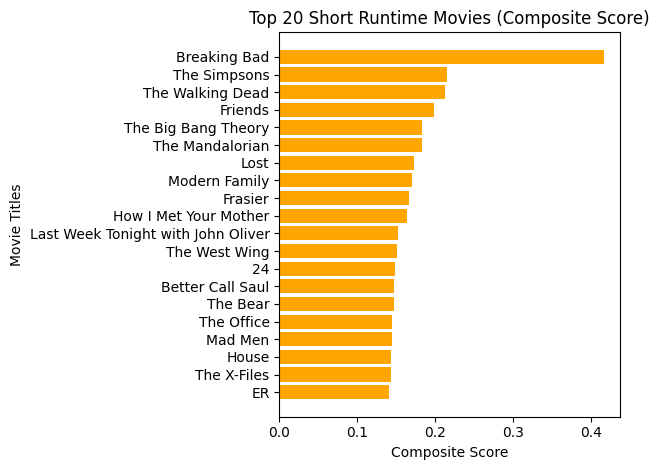

In [55]:
#Top 20 phim ngắn với Composite Score cao nhất
top_20_short_runtime = top_20_short_runtime.sort_values('Composite Score', ascending=True)

plt.barh(top_20_short_runtime['Title'], top_20_short_runtime['Composite Score'], color='orange')
plt.title('Top 20 Short Runtime Movies (Composite Score)')
plt.xlabel('Composite Score')
plt.ylabel('Movie Titles')
plt.tight_layout()
plt.show()


**Question 3: Explore the relationship between Rating and other columns**

To explore the relationship between the Runtime column and the other columns, we can conduct several analyses and visualizations. The goal is to understand how Runtime (the duration of the program or movie) correlates with other factors like Rating, Emmys, and Number of Votes.

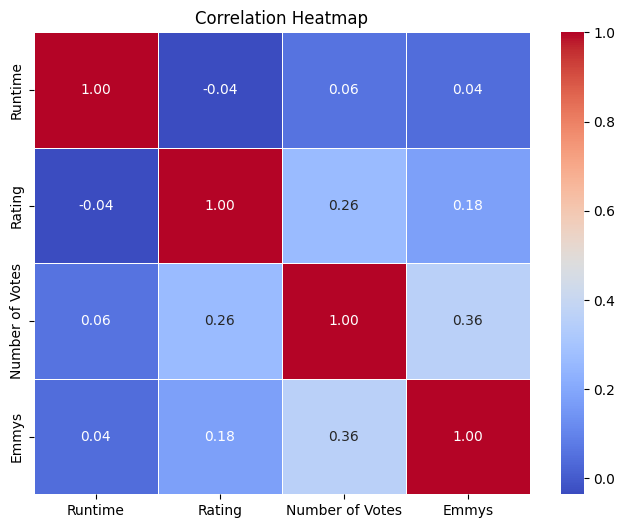

In [56]:

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


We notice that the **Number of Votes** column has a noticeable impact on the **Rating** column, with a correlation coefficient of 0.19. Although this number is not very high, it still indicates a slight relationship between the number of votes and the rating. This could mean that movies or programs that receive more votes from the audience tend to have higher ratings. This suggests that popular programs (those with more votes) are likely to be rated higher, possibly because they are viewed by a larger and more diverse audience, which could lead to a more favorable overall rating

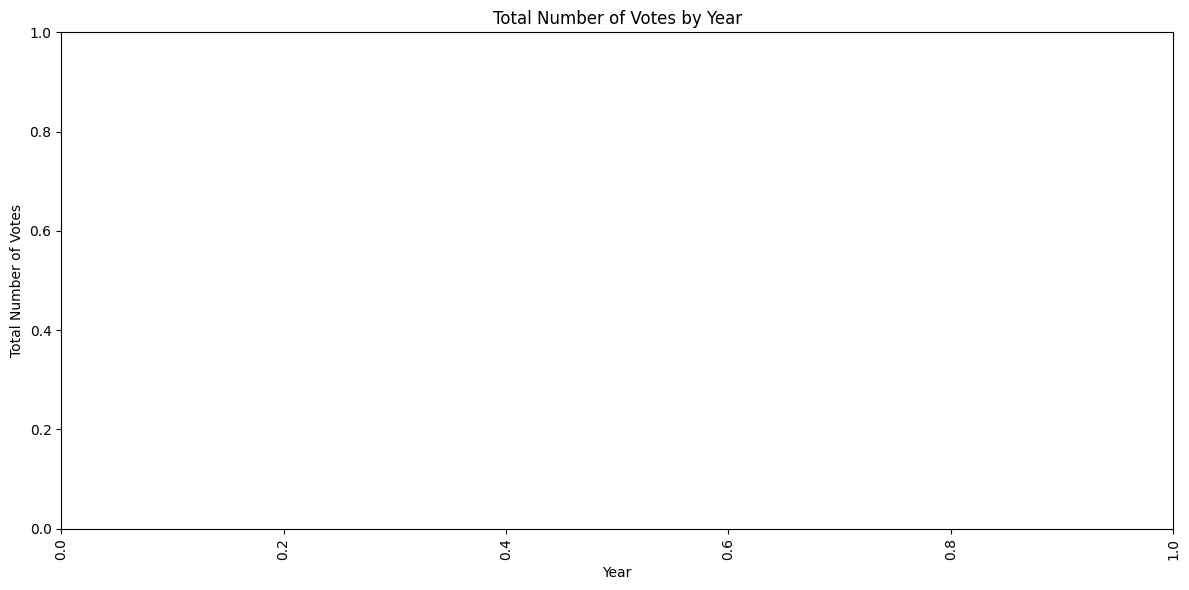

In [57]:

votes_by_year = data.groupby('Year')['Number of Votes'].sum().reset_index()

# Vẽ bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=votes_by_year, x='Year', y='Number of Votes', color='skyblue')


plt.title('Total Number of Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In recent years, the number of votes for movies has been steadily increasing, indicating that the film industry is thriving and attracting significant attention from audiences. For example, in 2021 and 2022, the number of votes for movies could reach up to **6,000,000 votes**. This reflects the growth in viewership and audience engagement with films, highlighting the increasing popularity of online platforms and streaming services, which provide a convenient way for audiences to participate in ratings and voting.

However, when collecting data from the website, we must note that the data for **2024** is still incomplete, as the year has not yet finished. Therefore, the number of votes for movies in 2024 will be lower than in previous years, and this number is likely to increase as the year concludes and movies continue to attract viewers and ratings in the remaining months.